### We are going to extract the nucleotide region from the start to end of the entire rep origin for each plasmid in out database

In [41]:
import pandas as pd
import numpy as np

plasmid_df = pd.read_csv("/scratch/alopatki_lab/Sharma/summer_project/db_w_blast_uniprot_oriflag.csv")

## <u>Task-1 </u>: 
1) Removing Bacteriophage/F1, yeast, oriT, eukaryotic, Homo sapiens then Generate list of all unique names and send to Allison
2) Check that all plasmids have atleast one ori

In [42]:
# Let us first check all feature labels with ori flag 1, we'll also store information about them

involved_in_rep = {}

for i in range(plasmid_df.shape[0]):
    curr_row = plasmid_df.iloc[i]

    if curr_row["Involved in Replication"] == 1:
        if curr_row["Feature Label"] not in involved_in_rep.keys():
            involved_in_rep[curr_row["Feature Label"]] = curr_row["Feature Note"]

In [43]:
for keys in involved_in_rep.keys():
    print(f"{keys}: {involved_in_rep[keys]}")


# To set Involved in Replication as 0 for : f1 ori, 2u ori, RSF1010 oriT, M13 ori, P2A, TRP1, ADE2, Gem1 (1-110)
features_to_unflag = ["f1 ori", "2u ori", "RSF1010 oriT", "M13 ori", "P2A", "TRP1", "ADE2", "Gem1 (1-110)"]

ori: high-copy-number ColE1/pMB1/pBR322/pUC origin of replication
f1 ori: f1 bacteriophage origin of replication; arrow indicates direction of (+) strand synthesis
rop: nan
p15A ori: Plasmids containing the medium-copy-number p15A origin of replication can be propagated in E. coli cells that contain a second plasmid with the ColE1 origin. 
pBBR1 Rep: nan
pBBR1 oriV: replication origin of the broad-host-range plasmid pBBR1 from Bordetella bronchiseptica; requires the pBBR1 Rep protein for replication
trfA: nan
oriV: incP origin of replication
R6K gamma ori: gamma replication origin from E. coli plasmid R6K; requires the R6K initiator protein pi for replication
RSF ori: Plasmids containing the RSF 1030 origin of replication can be propagated in E. coli cells that contain additional plasmids with compatible origins.
pVS1 StaA: nan
pVS1 RepA: nan
pVS1 oriV: origin of replication for the Pseudomonas plasmid pVS1 (Heeb et al., 2000)
Rep101: nan
pSC101 ori: low-copy replication origin that re

In [44]:
for i in range(plasmid_df.shape[0]):
    curr_row = plasmid_df.iloc[i]

    if curr_row["Feature Label"] in features_to_unflag:
        plasmid_df.at[i, "Involved in Replication"] = 0


In [5]:
plasmid_df.to_csv("/scratch/alopatki_lab/Sharma/summer_project/db_w_blast_uniprot_oriflag_v1.csv", index = False)

In [6]:
involved_in_rep_2 = {}

for i in range(plasmid_df.shape[0]):
    curr_row = plasmid_df.iloc[i]

    if curr_row["Involved in Replication"] == 1:
        if curr_row["Feature Label"] not in involved_in_rep_2.keys():
            involved_in_rep_2[curr_row["Feature Label"]] = curr_row["Feature Note"]

for keys in involved_in_rep_2.keys():
    print(f"{keys}: {involved_in_rep_2[keys]}")

ori: high-copy-number ColE1/pMB1/pBR322/pUC origin of replication
rop: nan
p15A ori: Plasmids containing the medium-copy-number p15A origin of replication can be propagated in E. coli cells that contain a second plasmid with the ColE1 origin. 
pBBR1 Rep: nan
pBBR1 oriV: replication origin of the broad-host-range plasmid pBBR1 from Bordetella bronchiseptica; requires the pBBR1 Rep protein for replication
trfA: nan
oriV: incP origin of replication
R6K gamma ori: gamma replication origin from E. coli plasmid R6K; requires the R6K initiator protein pi for replication
RSF ori: Plasmids containing the RSF 1030 origin of replication can be propagated in E. coli cells that contain additional plasmids with compatible origins.
pVS1 StaA: nan
pVS1 RepA: nan
pVS1 oriV: origin of replication for the Pseudomonas plasmid pVS1 (Heeb et al., 2000)
Rep101: nan
pSC101 ori: low-copy replication origin that requires the Rep101 protein
CloDF13 ori: Plasmids containing the CloDF13 (CDF) origin of replication

In [7]:
features = [x for x in involved_in_rep_2.keys()]
for i in features:
    print(i , end = ', ')

ori, rop, p15A ori, pBBR1 Rep, pBBR1 oriV, trfA, oriV, R6K gamma ori, RSF ori, pVS1 StaA, pVS1 RepA, pVS1 oriV, Rep101, pSC101 ori, CloDF13 ori, SV40 ori, RSF1010 oriV, RSF1010 RepB, RSF1010 RepA, lef2, pRO1600 Rep, pRO1600 oriV, Rep101(Ts), Cdt1 (30-120), AMA1, ColA ori, Gam, Mxe GyrA intein, CBD, RSF1010 RepC, traJ, pSG5 Rep, APOBEC3A, pSa ori, ori2, repE, sopA, sopB, repB, ars1, Taq polymerase, GB1, Rta AD, RepA, oriP, M13 gene V, M13 gene II, LshC2c2, ARS1, Csy4, 

In [45]:
# Checking if any plasmid is present that does not have an ori

plasmid_ids = list(set(plasmid_df["Plasmid ID"].values))
no_ori_plasmid = []
for ids in plasmid_ids:
    slice = plasmid_df[plasmid_df["Plasmid ID"] == ids]
    feature_type_slice = list(set(slice["Feature Type"].values))

    if 'rep_origin' not in feature_type_slice:
        no_ori_plasmid.append(ids)

print(len(no_ori_plasmid))

# 296 plasmids in our data do not have a rep_origin

296


In [46]:
print(len(plasmid_ids))

13618


In [47]:
# Maintaining the row indices that we have to remove
row_to_rem = []

for indices in range(plasmid_df.shape[0]):
    if plasmid_df.at[indices, "Plasmid ID"] in no_ori_plasmid:
        row_to_rem.append(indices)

len(row_to_rem)

3292

In [48]:
# removing those rows 
plasmid_df = plasmid_df.drop(plasmid_df.index[row_to_rem])

In [72]:
plasmid_df.to_csv("/scratch/alopatki_lab/Sharma/summer_project/db_w_blast_uniprot_oriflag_v1.csv", index = False)

In [106]:
from Bio.Seq import Seq
from Bio.SeqFeature import SeqFeature, FeatureLocation

def extract_sequence_biopython(sequence_record, location_string):
  """
  Extracts a nucleotide sequence from a Biopython SeqRecord based on the location string.

  Args:
      sequence_record (Bio.SeqRecord.SeqRecord): The SeqRecord containing the complete sequence.
      location_string (str): The gene location string in the format "[start:end](strand)" 
                               or "join{[start:end](strand), [start:end](strand), ...}".

  Returns:
      Bio.Seq.Seq: The extracted nucleotide sequence as a Biopython Seq object.
  """
  print(location_string)
  if location_string.startswith("join"):
    extracted_sequence = Seq("")  # Initialize empty Seq object
    locations = location_string[5:-1].split(", ")
    for loc in locations:
        start, end, strand = extract_location_details(loc)
        extracted_sequence += sequence_record.seq[start:end]
        if strand == "-":
            extracted_sequence = extracted_sequence.reverse_complement()
    return extracted_sequence
  else:
    start, end, strand = extract_location_details(location_string)
    extracted_sequence = sequence_record.seq[start:end]
    if strand == "-":
        extracted_sequence = extracted_sequence.reverse_complement()
    return extracted_sequence

def extract_location_details(location_string):
  """Helper function to extract start, end, and strand from a location string."""
  
  start, end_strand = location_string[1:-1].split(":")
  end, strand = end_strand[:-3], end_strand[-1]
  print(start, end, strand)
  return int(start), int(end), strand

# # Example usage:
# plasmid_sequence = "ATGCGTACGTAGCTAGCATGCATGCATCGATCGATCGATCGATCGATCG"
# plasmid_record = SeqRecord(Seq(plasmid_sequence), id="MyPlasmid")

# # Single location extraction
# gene_location = "[2293:2313](+)" 
# extracted_gene_sequence = extract_sequence_biopython(plasmid_record, gene_location)
# print("Extracted gene sequence:", extracted_gene_sequence)

# # Multiple location extraction (with "join")
# joined_locations = "join{[8987:8989](+), [0:93](+)}"
# joined_sequence = extract_sequence_biopython(plasmid_record, joined_locations)
# print("Joined sequence:", joined_sequence)

In [ ]:
# Let's try if these functions work as intended

plasmid_ids = list(plasmid_df["Plasmid ID"].values)

slice = plasmid_df[plasmid_df["Plasmid ID"] == plasmid_ids[78]]
whole_seq = slice.iloc[0]["Feature Sequence"]
loc_1 = slice.iloc[1]["Feature Location"]
loc_2 = slice.iloc[9]["Feature Location"]
print(extract_sequence_biopython(whole_seq, loc_1))

In [90]:
slice

,Plasmid ID,Plasmid Name,Vector backbone,Vector type,Bacterial Resistance(s),Growth Temperature,Growth Strain(s),Copy number,Gene/Insert name,Species,...,Feature Type,Feature Label,Feature Note,Feature Location,Feature Sequence,Feature Length,Blast Titles,Blast Prot Seq,Go Annotations,Involved in Replication
65,148623,pnYC-NpM-DmRoquin_702-819-del790-812-GB1His6_AE,Unknown,bacterial,"Chloramphenicol, 25 μg/mL",37°C,DH5alpha,Low Copy,DmRoquin_702-819-del790-812,D. melanogaster (fly),...,source,Sequence,Full plasmid Sequence,[0:5993](+),GGTATGGCAATGAAAGACGGTGAGCTGGTGATATGGGATAGTGTTC...,5993,NaN,NaN,NaN,0
66,148623,pnYC-NpM-DmRoquin_702-819-del790-812-GB1His6_AE,Unknown,bacterial,"Chloramphenicol, 25 μg/mL",37°C,DH5alpha,Low Copy,DmRoquin_702-819-del790-812,D. melanogaster (fly),...,primer_bind,pBRrevBam,"pBR322 vectors, tet region, downstream of BamH...",[2293:2313](+),GGTGATGTCGGCGATATAGG,20,NaN,NaN,NaN,0
67,148623,pnYC-NpM-DmRoquin_702-819-del790-812-GB1His6_AE,Unknown,bacterial,"Chloramphenicol, 25 μg/mL",37°C,DH5alpha,Low Copy,DmRoquin_702-819-del790-812,D. melanogaster (fly),...,primer_bind,T7,"T7 promoter, forward primer",[2401:2421](+),TAATACGACTCACTATAGGG,20,NaN,NaN,NaN,0
68,148623,pnYC-NpM-DmRoquin_702-819-del790-812-GB1His6_AE,Unknown,bacterial,"Chloramphenicol, 25 μg/mL",37°C,DH5alpha,Low Copy,DmRoquin_702-819-del790-812,D. melanogaster (fly),...,promoter,T7 promoter,promoter for bacteriophage T7 RNA polymerase,[2401:2420](+),TAATACGACTCACTATAGG,19,NaN,NaN,NaN,0
69,148623,pnYC-NpM-DmRoquin_702-819-del790-812-GB1His6_AE,Unknown,bacterial,"Chloramphenicol, 25 μg/mL",37°C,DH5alpha,Low Copy,DmRoquin_702-819-del790-812,D. melanogaster (fly),...,protein_bind,lac operator,The lac repressor binds to the lac operator to...,[2420:2445](+),GGAATTGTGAGCGGATAACAATTCC,25,NaN,NaN,NaN,0
70,148623,pnYC-NpM-DmRoquin_702-819-del790-812-GB1His6_AE,Unknown,bacterial,"Chloramphenicol, 25 μg/mL",37°C,DH5alpha,Low Copy,DmRoquin_702-819-del790-812,D. melanogaster (fly),...,CDS,MBP,This version of the gene does not encode a sig...,[2488:3589](+),ATGGAAACTGAAGAAGGTAAACTGGTAATCTGGATTAACGGCGATA...,1101,"['pdb|3MQ9|A Chain A, Bone marrow stromal anti...",['MKIEEGKLVIWINGDKGYNGLAEVGKKFEKDTGIKVTVEHPDKL...,"{'molecular_function': ['protein binding', 'ca...",0
71,148623,pnYC-NpM-DmRoquin_702-819-del790-812-GB1His6_AE,Unknown,bacterial,"Chloramphenicol, 25 μg/mL",37°C,DH5alpha,Low Copy,DmRoquin_702-819-del790-812,D. melanogaster (fly),...,CDS,HRV 3C site,NaN,[3604:3628](+),CTGGAAGTTCTGTTCCAGGGGCCC,24,NaN,NaN,NaN,0
72,148623,pnYC-NpM-DmRoquin_702-819-del790-812-GB1His6_AE,Unknown,bacterial,"Chloramphenicol, 25 μg/mL",37°C,DH5alpha,Low Copy,DmRoquin_702-819-del790-812,D. melanogaster (fly),...,CDS,HRV 3C site,NaN,[3931:3955](+),CTGGAAGTTCTGTTCCAGGGGCCC,24,NaN,NaN,NaN,0
73,148623,pnYC-NpM-DmRoquin_702-819-del790-812-GB1His6_AE,Unknown,bacterial,"Chloramphenicol, 25 μg/mL",37°C,DH5alpha,Low Copy,DmRoquin_702-819-del790-812,D. melanogaster (fly),...,CDS,6xHis,NaN,[4135:4153](+),CATCATCATCATCATCAC,18,NaN,NaN,NaN,0
74,148623,pnYC-NpM-DmRoquin_702-819-del790-812-GB1His6_AE,Unknown,bacterial,"Chloramphenicol, 25 μg/mL",37°C,DH5alpha,Low Copy,DmRoquin_702-819-del790-812,D. melanogaster (fly),...,primer_bind,T7 Term,"T7 terminator, reverse primer",[4224:4243](-),GCTAGTTATTGCTCAGCGG,19,NaN,NaN,NaN,0


## <u> Task-II </u>
1. Extracting the nucleotide region of continguos oriflag = 1's for each plasmid
2. Naming the replicons, making a dataframe of all plasmids and the replicons present in them with the nucleotide sequence  

In [49]:
def extract_nucleotide(dataframe_slice):
    ori_flags = list(dataframe_slice["Involved in Replication"].values)
    blocks = []
    s,e = 0,0
    while s < dataframe_slice.shape[0]:
        if ori_flags[s] == 1:
            e = s
            while e < dataframe_slice.shape[0] and ori_flags[e] == 1:
                e += 1
            if e == s+1:
                blocks.append(s)
            else:
                blocks.append([s, e-1])
            s = e
        else:
            s += 1

    # print(blocks)
    # We now have all the areas of interest, we will now make name for each replicon identified, 
    # get the corresponding nucleotide seq and return a dictionary

    names_list = [x for x in dataframe_slice["Feature Label"].values]
    seq_list = [x for x in dataframe_slice["Feature Sequence"].values]
    # print(names_list)
    result_dict = {}
    
    for each_block in blocks:
        if type(each_block) == int:
            name = names_list[each_block]
            rep_seq = seq_list[each_block]
            result_dict[name] = rep_seq
        else:
            s,e = each_block[0], each_block[1]
            
            name = ''
            for i in range(s,e+1):
                name += names_list[i]
                name += '+'
            name = name[:-1]
            # print(name)
            rep_seq = ''
            for i in range(s,e+1):
                rep_seq += seq_list[i]
                
            result_dict[name] = rep_seq
    # print(result_dict[name])
    return result_dict
            
            

# # Example instance
# plasmid_ids = list(set(plasmid_df["Plasmid ID"].values))

# slice = plasmid_df[plasmid_df["Plasmid ID"] == 124411]



# extract_nucleotide(slice)

plasmid_ids = list(set(plasmid_df["Plasmid ID"].values))

replicon_list = {}

for ids in plasmid_ids:
    slice = plasmid_df[plasmid_df["Plasmid ID"] == ids]

    replicon_list[ids] = extract_nucleotide(slice)

In [50]:
len(replicon_list)

13322

In [58]:
replicon_nuc_dict = {}

for ids in replicon_list.keys():
    curr_dict = replicon_list[ids]
    for each_key in curr_dict:
        if each_key in replicon_nuc_dict:
            if curr_dict[each_key] not in replicon_nuc_dict[each_key]:
                replicon_nuc_dict[each_key].append(curr_dict[each_key])
        else:
            replicon_nuc_dict[each_key] = [curr_dict[each_key]]

In [68]:
print(list(replicon_nuc_dict.keys())[0])
all_oris = replicon_nuc_dict[list(replicon_nuc_dict.keys())[0]]
for i in range(len(all_oris[0])):
    if all_oris[0][i] != all_oris[1][i]:
        # print(i)
        print(all_oris[0][:i+1], end = '      ')
        print(all_oris[0][i+1:], end = '      ')
        print()
        print(all_oris[1][:i+1], end = '      ')
        print(all_oris[1][i+1:], end = '      ')
        break
# print(all_oris[0])
# print(all_oris[1])

ori
TTGAGATCCTTTTTTTCTGCGCGTAATCTGCTGCTTGCAAACAAAAAAACCACCGCTACCAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCAAATACTGTC      CTTCTAGTGTAGCCGTAGTTAGGCCACCACTTCAAGAACTCTGTAGCACCGCCTACATACCTCGCTCTGCTAATCCTGTTACCAGTGGCTGCTGCCAGTGGCGATAAGTCGTGTCTTACCGGGTTGGACTCAAGACGATAGTTACCGGATAAGGCGCAGCGGTCGGGCTGAACGGGGGGTTCGTGCACACAGCCCAGCTTGGAGCGAACGACCTACACCGAACTGAGATACCTACAGCGTGAGCTATGAGAAAGCGCCACGCTTCCCGAAGGGAGAAAGGCGGACAGGTATCCGGTAAGCGGCAGGGTCGGAACAGGAGAGCGCACGAGGGAGCTTCCAGGGGGAAACGCCTGGTATCTTTATAGTCCTGTCGGGTTTCGCCACCTCTGACTTGAGCGTCGATTTTTGTGATGCTCGTCAGGGGGGCGGAGCCTATGGAAA      
TTGAGATCCTTTTTTTCTGCGCGTAATCTGCTGCTTGCAAACAAAAAAACCACCGCTACCAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCAAATACTGTT      CTTCTAGTGTAGCCGTAGTTAGGCCACCACTTCAAGAACTCTGTAGCACCGCCTACATACCTCGCTCTGCTAATCCTGTTACCAGTGGCTGCTGCCAGTGGCGATAAGTCGTGTCTTACCGGGTTGGACTCAAGACGATAGTTACCGGATAAGGCGCAGCGGTCGGGCTGAACGGGGGGTTCGTGCACACAGCCCAGCTTGGAGCGAACGACCTACACCGAACTGAGATACCTACAGCGT

In [71]:
# Counting the range of number of distinct nucleotise seqeunces we have
range_nucs = []
for each_rep in replicon_nuc_dict.keys():
    curr_number_of_seq = len(replicon_nuc_dict[each_rep])
    if curr_number_of_seq not in range_nucs:
        range_nucs.append(curr_number_of_seq)

print(range_nucs)
print(sum(range_nucs))
total_reps = 0
for i in range(len(replicon_list)):
    key = list(replicon_list.keys())[i]
    curr_dict = replicon_list[key]
    total_reps += len(curr_dict)

print(total_reps)

[128, 12, 25, 3, 8, 5, 2, 22, 23, 4, 11, 1, 6]
250
19024


In [13]:
# Let's count the total number of unique replicons we have all together before remocing similar ones

unique_reps = []

for id in replicon_list.keys():
    reps = replicon_list[id]
    for each_rep in reps:
        if each_rep not in unique_reps:
            unique_reps.append(each_rep)

print(len(unique_reps))

# Therefore before removing the similar replicons we have 93 unique replicons 

93


In [73]:
print(unique_reps)

['ori', 'rop', 'p15A ori', 'RSF ori', 'pVS1 StaA+pVS1 RepA+pVS1 oriV', 'SV40 ori', 'Mxe GyrA intein+CBD', 'pSa ori', 'pSC101 ori+Rep101', 'pBBR1 oriV+pBBR1 Rep', 'Rep101+pSC101 ori', 'RSF1010 RepB+RSF1010 RepA', 'RSF1010 oriV', 'R6K gamma ori', 'traJ', 'lef2', 'CloDF13 ori', 'Rep101(Ts)+pSC101 ori', 'ARS1', 'GB1', 'pRO1600 Rep+pRO1600 oriV', 'RSF1010 RepA+RSF1010 RepB', 'ColA ori', 'Gam', 'trfA+oriV', 'ori2+oriV', 'sopB+sopA', 'repE', 'repE+ori2+oriV', 'repB', 'pRO1600 oriV+pRO1600 Rep', 'M13 gene II+M13 gene V', 'pSC101 ori', 'Rep101', 'CBD', 'RepA+pSa ori', 'trfA+traJ+oriV+ori', 'pBBR1 Rep+pBBR1 oriV', 'pBBR1 oriV+pBBR1 Rep+ori', 'oriV+ori', 'trfA+traJ', 'pSC101 ori+Rep101(Ts)', 'pSG5 Rep', 'pVS1 StaA', 'pVS1 oriV+pVS1 RepA', 'pVS1 RepA+pVS1 StaA', 'pVS1 oriV', 'pVS1 oriV+pVS1 RepA+pVS1 StaA', 'pVS1 RepA+pVS1 oriV', 'Taq polymerase', 'traJ+ori', 'trfA+oriV+traJ', 'LshC2c2', 'RSF1010 RepB', 'RSF1010 RepA', 'pVS1 StaA+pVS1 RepA', 'oriV+ori2+repE', 'trfA', 'oriV', 'traJ+trfA', 'oriV+trf

In [14]:
!pip install pyfastani

In [15]:
# Making a dictionary of replicon names and their nucleotide sequences

reps = {}

for ids in replicon_list.keys():
    curr_reps = replicon_list[ids]
    for each_rep in curr_reps:
        if each_rep not in reps.keys():
            reps[each_rep] = curr_reps[each_rep]

# reps

In [16]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

def calculate_sequence_similarity(seq1, seq2):
    """To Calculate the percentage identity (ANI) between two nucleotide sequences.

    Input:
        seq1 (str): The first nucleotide sequence.
        seq2 (str): The second nucleotide sequence.

    Returns:
        float: The percentage identity between the two sequences.
    """

    alignments = pairwise2.align.globalxx(seq1, seq2, score_only=False)
    best_alignment = alignments[0]  # Getting the best alignment
    aligned_seq1, aligned_seq2, score, _, _ = best_alignment

    # Calculating percentage identity
    matches = sum(1 for a, b in zip(aligned_seq1, aligned_seq2) if a == b)
    similarity = (matches / len(aligned_seq1)) * 100

    # print(format_alignment(*best_alignment)) 
    return similarity

# Example usage
all_reps = list(reps.keys())
seq1 = reps[all_reps[0]]
seq2 = reps[all_reps[3]]

similarity = calculate_sequence_similarity(seq1, seq2)
print(f"Sequence Similarity: {similarity:.2f}%")

Sequence Similarity: 63.49%


/scratch/alopatki_lab/Sharma/summer_project/my_envs/addgene/lib/python3.12/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [17]:
# Now we will calculate Pairwise ANI between different replicons and make a heatmap of it, try to see the similar ones
columns = {'Replicon-1': str, "Replicon-2": str, "ANI": float}
heatmap_df = pd.DataFrame(columns = columns.keys()).astype(columns)

unique_reps = list(reps.keys())

for i in range(len(unique_reps)):
    for j in range(i, len(unique_reps)):
        rep_1 = unique_reps[i]
        rep_2 = unique_reps[j]
        ani = calculate_sequence_similarity(reps[rep_1], reps[rep_2])
        heatmap_df.loc[len(heatmap_df)] = [rep_1, rep_2, ani]



In [39]:
# reps[unique_reps[0]]
print(unique_reps[92])
print(reps[unique_reps[92]])
print(reps[unique_reps[0]])

R6K gamma ori+ori
TGTCAGCCGTTAAGTGTTCCTGTGTCACTCAAAATTGCTTTGAGAGGCTCTAAGGGCTTCTCAGTGCGTTACATCCCTGGCTTGTTGTCCACAACCGTTAAACCTTAAAAGCTTTAAAAGCCTTATATATTCTTTTTTTTCTTATAAAACTTAAAACCTTAGAGGCTATTTAAGTTGCTGATTTATATTAATTTTATTGTTCAAACATGAGAGCTTAGTACGTGAAACATGAGAGCTTAGTACGTTAGCCATGAGAGCTTAGTACGTTAGCCATGAGGGTTTAGTTCGTTAAACATGAGAGCTTAGTACGTTAAACTTGAGAGCTTAGTACGTGAAACATGAGAGCTTAGTACGTACTTGAGATCCTTTTTTTCTGCGCGTAATCTGCTGCTTGCAAACAAAAAAACCACCGCTACCAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCAAATACTGTCCTTCTAGTGTAGCCGTAGTTAGGCCACCACTTCAAGAACTCTGTAGCACCGCCTACATACCTCGCTCTGCTAATCCTGTTACCAGTGGCTGCTGCCAGTGGCGATAAGTCGTGTCTTACCGGGTTGGACTCAAGACGATAGTTACCGGATAAGGCGCAGCGGTCGGGCTGAACGGGGGGTTCGTGCACACAGCCCAGCTTGGAGCGAACGACCTACACCGAACTGAGATACCTACAGCGTGAGCTATGAGAAAGCGCCACGCTTCCCGAAGGGAGAAAGGCGGACAGGTATCCGGTAAGCGGCAGGGTCGGAACAGGAGAGCGCACGAGGGAGCTTCCAGGGGGAAACGCCTGGTATCTTTATAGTCCTGTCGGGTTTCGCCACCTCTGACTTGAGCGTCGATTTTTGTGATGCTCGTCAGGGGGGCGGAGCCTATGGAAA
TTGAGATCCTTTTTTTCTGCGCGTAATCTGCTGCT

In [26]:
heatmap_df.to_csv("/scratch/alopatki_lab/Sharma/summer_project/replicon_ANI.csv", index = False)


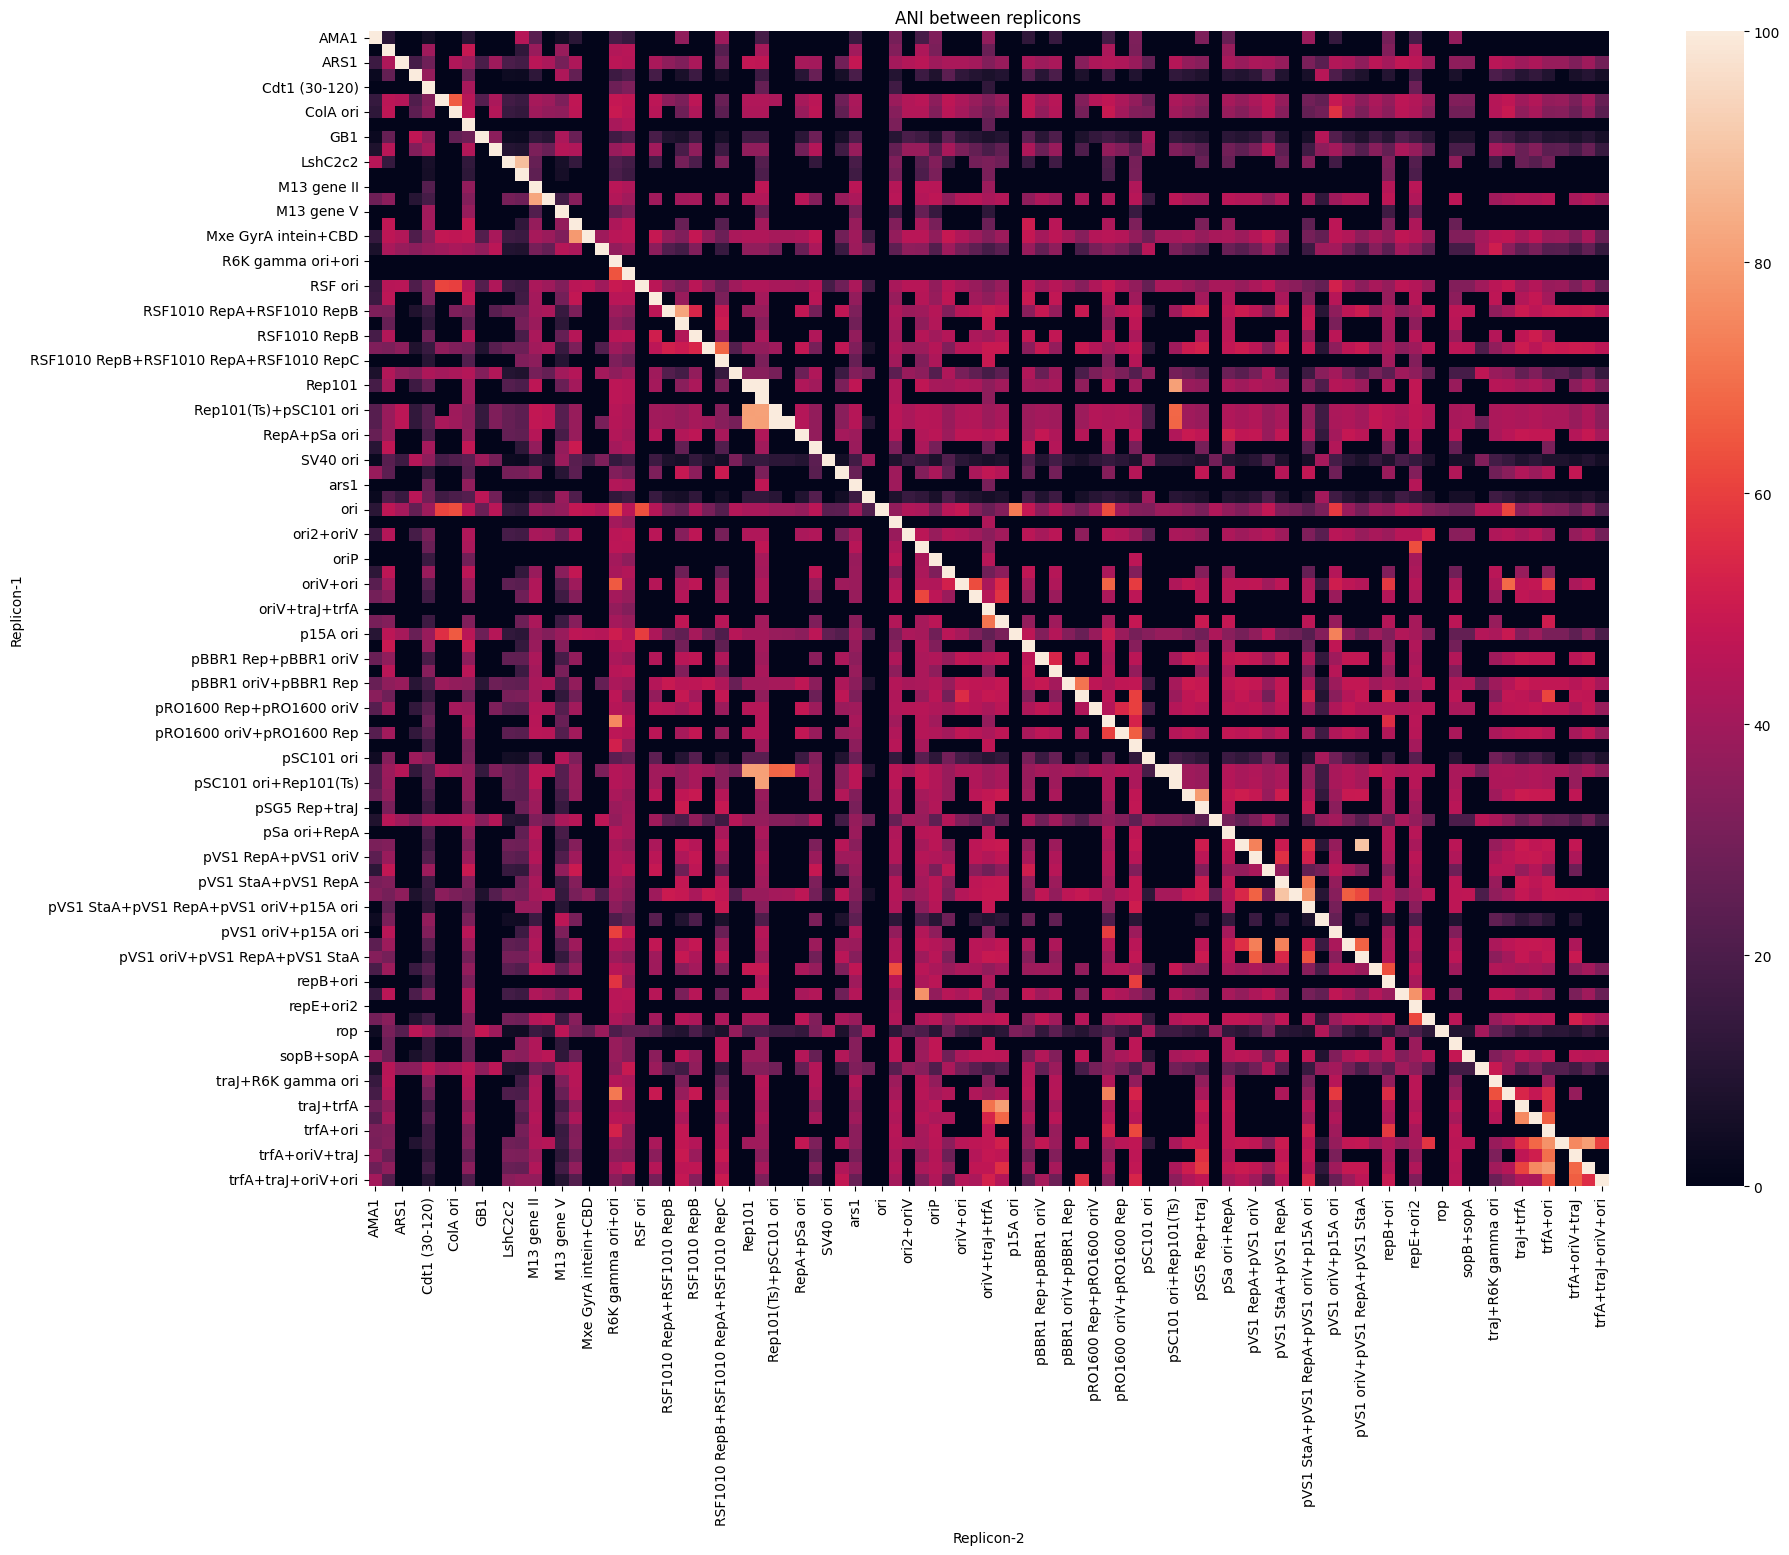

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
pivot_df = heatmap_df.pivot_table(index = 'Replicon-1', columns = 'Replicon-2', values = "ANI", fill_value = 0)
plt.figure(figsize = (20,15))
# sns.heatmap(pivot_df, cmap = 'viridis')
sns.heatmap(pivot_df, cmap = 'rocket')

plt.title("ANI between replicons")
plt.savefig("/scratch/alopatki_lab/Sharma/summer_project/ANI_heatmap.png")
plt.show()

In [24]:
import seaborn as sns
print(sns.__version__)  # This will print the installed seaborn version

0.13.2
